# MA124 Maths by Computer: Assignment 3

You will submit **two Jupyter notebooks**, one for each part.

---

## A. Monte Carlo Integration (10 marks)

Consider the integral

$$
\int_a^b f(x) \, dx
$$

where $f(x) = -\sin(x)/x$, $a=\pi$ and $b = 4\pi$. As noted [here](https://en.wikipedia.org/wiki/Nonelementary_integral), $\sin(x)/x$ does not have an elementary antiderivative so we must use numerical methods to evaluate this integral.

**Assignment:** Estimate the above integral using two Monte Carlo methods.

1. Use Monte Carlo to estimate $\bar f$, the mean value of $f$ over the interval $[a,b]$. From this estimate the integral. 


2. Use the fact that 
$$
\int_a^b f(x) \, dx = \text{signed area under the curve}
$$

where "signed under the curve" means the area between the curve $y = f(x)$ and the x axis, taking care of positive and negative contributions to the integral. See [here](https://en.wikipedia.org/wiki/Integral).   Use Monte Carlo to estimate the integral by estimating areas. 
    
Details: 
- Approach 1 is straightforward. You can use $10^6$ samples to get a reasonably accurate estimate of $\bar f$ and from this an estimate for the integral, but DO NOT PLOT THE SAMPLES! Report the value of the integral and produce a plot showing $y = f(x)$ and a rectangular box $[a,b] \times [0,\bar f]$.
    
- Approach 2 requires Monte Carlo samples in a rectangular region $[a,b] \times [y_{min}, y_{max}]$, where $y_{min}$ and $y_{max}$ should be such as to contain the graph $y = f(x)$, but not too much larger. The graph partitions the rectangle into three types of regions - those that contribute positively to the integral, those that contributed negatively to the integral, and those that do not contribute. From the areas, estimate the integral and report the value. For a sample size of $N=2000$ (NOT LARGER!) produce a plot showing the Monte Carlo points coloured according to the type of region they are in. There should be three colours. Include on the plot the graph $y = f(x)$ and a line on the x axis. 

- Plot a small square with the average colour of the plot of Approach 2. 

In [2]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from scipy.stats import lognorm

The Monte Carlo estimate for the integral is 0.35916330480409436


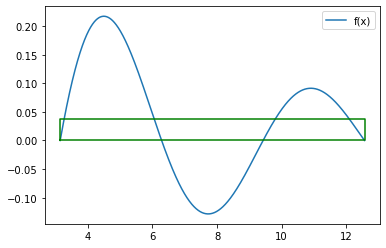

In [3]:
def my_func(x):
    return -np.sin(x)/x

# set the interval [a,b] and the number of samples
a, b = np.pi, 4*np.pi

N = 10**6 # number of samples

# generate the samples and evaluate f at each 
x = np.random.uniform(a, b, N)
f_of_x = my_func(x)

# compute the mean and estimate the integral
f_mean = np.mean(f_of_x)
my_integral = (b-a) * f_mean

print("The Monte Carlo estimate for the integral is", my_integral)

# plots y = f(x) on [a,b], # plots rectangular box [a,b] × [0,fbar].
x_plot = np.linspace(a, b, 1000)
y_plot = my_func(x_plot)
plt.plot(x_plot,y_plot, label = "f(x)")
plt.plot([a,b,b,a,a],[0,0,f_mean, f_mean,0], 'g') 
plt.legend()
plt.show()

The figure above shows the graph y = $f(x)$ = $-sin(x)/x$ on [$\pi$,$4\pi$] also plotted is a rectangle using the base and the mean of the values $f(x_i)$

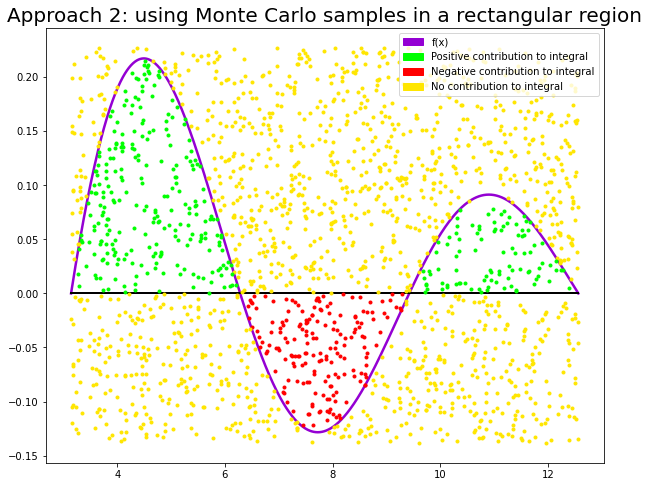

The Monte Carlo estimate for the integral with samples in a rectangular region  (3.14, 12.57) × (-0.14, 0.23) is 0.28772156120243514


In [6]:
# compute y_min and y_max and slightly adjust in order to contain the graph -sin(x)/x'''
y_min, y_max = np.min(y_plot) - 0.01, np.max(y_plot) + 0.01

N = 2000 # sample size

# generate the samples in a rectangular region as described above
X = np.random.uniform(a, b, N)
Y = np.random.uniform(y_min , y_max, N)

#lables, titles making plot look pretty etc.
plt.figure(figsize = (10,8))
plt.title("Approach 2: using Monte Carlo samples in a rectangular region", fontsize=20)

#plot line x-axis and -sin(x)/x
plt.plot(x_plot,y_plot, lw = 2.5, color = "darkviolet")
plt.plot(x_plot,0*x_plot, color = 'k', lw = 2, label = "x-axis")

# legends to indicate the type of contribution to the integral
func = mpatch.Patch(color = "darkviolet", label = "f(x)")
pos_con = mpatch.Patch(color = (0,1,0), label = "Positive contribution to integral")
neg_con = mpatch.Patch(color = (1,0,0), label = "Negative contribution to integral")
no_con = mpatch.Patch(color = (1, 0.9, 0), label = "No contribution to integral")

total = 0 # the number of points that contribute positively to the integral

for i in range(0,N):
    if Y[i] <= my_func(X[i]) and Y[i] >= 0:
        # above if statement describes those points that have positive contribution to the integral
        plt.plot(X[i], Y[i], '.', color = (0,1,0)) #plots those point in green
        total += 1 
    elif Y[i] >= my_func(X[i]) and Y[i] < 0:
        # above elif statement describes those points that have negative contribution to the integral
        plt.plot(X[i], Y[i], '.', color = (1,0,0)) #plots those point in red
        total -= 1
    else:
        #above else statement refers to those points that have no contribution to the integral
        plt.plot(X[i], Y[i], '.', color = (1, 0.9, 0)) #plots those point in yellow

# self-explanatory
rectangle_area = (b-a) * (y_max-y_min)
region_area = rectangle_area * (total/N)

plt.legend(handles = [func, pos_con, neg_con, no_con])
plt.show()
print("The Monte Carlo estimate for the integral with samples in a rectangular region  ({}, {}) × ({}, {}) is {}".format(round(a, 2), round(b, 2), round(y_min, 2), round(y_max, 2), region_area))

The figure above explains itself, but what is clear is that most points plotted have no contribution to the integral.

Average RGB Normalized decimal = (0.826, 0.8359500000000187, 0.0) 



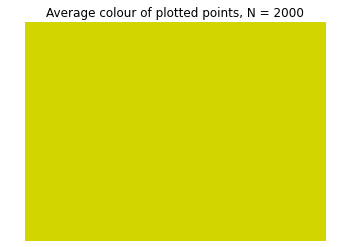

In [7]:
R = 0
G = 0
B = 0
#very similar to code cell above only this time we sume the individual RGB values for each of the cases
for i in range(0,N):
    if Y[i] <= my_func(X[i]) and Y[i] >= 0:
        G += 1
    elif Y[i] >= my_func(X[i]) and Y[i] < 0:
        R += 1
    else:
        R += 1
        G += 0.9
R_mean = R / N
G_mean = G / N
B_mean = B / N

plt.plot(0.5, 0.5, 's', markersize=300, color = (R_mean,G_mean,B_mean))
plt.axis('off') #makes plot a nice square
plt.title("Average colour of plotted points, N = 2000")
print("Average RGB Normalized decimal =", (R_mean, G_mean, B_mean), '\n')

The figure above shows that most points plotted in Approach 2 have no contribution to the integral so its colour is yellow (although slightly darker) which is what is expected since those points which have no contribution to the integral were plotted in yellow.

---

## B. Geometric Brownian Motion (12 marks)


The stochastic differential equation

$$
\dot S(t) = \mu S(t) + \sigma S(t) \xi(t)
$$

plays a central role in mathematical finance. This equation describes what is known as [Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion).  $S(t)$ is taken to be positive and represents the value of a stock at time $t$. The deterministic ODE $\dot S(t) = \mu S(t)$, describes exponential growth in the value of a stock. We consider $\mu > 0$ and refer to $\mu$ as the growth rate. The term $\sigma S(t) \xi(t)$ describes fluctuations in the value of a stock. $\xi(t)$ is a Gaussian random variable. The parameter $\sigma > 0$ is known as the volatility. Notice that the fluctuating term contains $S(t)$ itself. This models the fact that fluctuations in a stock price are proportional to the price. 

Time $t$ is measured in years. Typical values for $\mu$ are between $0.01$ and $0.10$, corresponding to 1% and 10% annual growth (non-compounded). We assume values for $\sigma$ are between $0.1$ and $0.4$. 


[This](https://www.investopedia.com/articles/07/montecarlo.asp) and [this](https://www.investopedia.com/ask/answers/021015/how-can-you-calculate-volatility-excel.asp) are simple articles on [investopedia.com](https://www.investopedia.com) that might be of interest.


**Assignment:** Write a Python function to solve the above SDE by Euler's method. Then call the function, plot and analyse the solution for one choice of parameter values $\mu$ and $\sigma$. 

Details: 

- Implementation:
    - You must write a function `SDE_GBM(S0, tf, mu, sigma, Npaths)` that compute `Npaths` paths of the SDE and returns `t, S`. The function should not plot the results.
    - `Nsteps` is not included as an argument to the function. `Nsteps` should be set to `365 * tf` corresponding to a time step of 1 day. (In practice it is common to use the number of trading days in a year, but we will use 365.)
    - The implementation is a straightforward generalisation of the example SDEs in the Week 6 notebooks. Copy and modify those examples as needed. You need to include $S$ in the fluctuating term, but still use $\sqrt{\Delta t}$ as usual. 


- Parameters:
    - Use a final time of $t_f = 5$, corresponding to 5 years. 
    - Decide the values you want to use for the parameters $\mu$ and $\sigma$ consistent with the discussion above.
    - Take the initial stock price to be $S_0 = 100$. 
    
    
- Plots:    
    - Plot `Npaths=100` sample paths $S(t)$. 
    - Now call your function with `Npaths = 2000`. Make a plot showing the mean +/- standard deviation for the 2000 paths as a function of time, as discussed in the Week 6 notebooks.
    - With the same data as the previous item, plot histograms at three times, one of which should be the final time. (You might not want equally spaced times.) Either plot all three histograms on the same plot, or else in three plots all with the same limits on all plots (so that they can be compared). Print the mean and standard deviation for each of the histograms. 
    

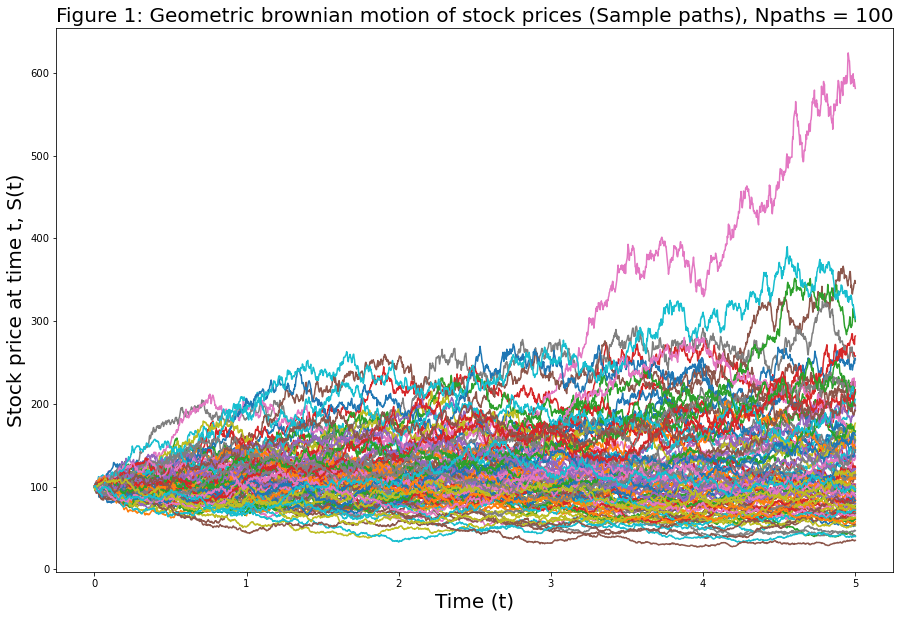

In [24]:
# In this cell we Time step SDE: dot S = mu * S(t) + S(t) * sigma xi, by Euler's method.


# Problem setup. 
# Set model and numerical parameters, and the initial condition.
mu = 0.055
sigma = 0.25
tf = 5
S0 = 100

def SDE_GBM(S0, tf, mu, sigma, Npaths):
    # Generate the time grid and solution array
    Nsteps = 365 * tf
    t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
    S = np.zeros((Nsteps+1,Npaths))
    root_dt = np.sqrt(dt)
    
    # Time step starting from initial condition
    S[0,:] = S0;
    for n in range(Nsteps):
        F_of_S = mu * S[n,:]
        S[n+1,:] =  S[n,:] + (dt * F_of_S) + (sigma * S[n,:] * root_dt * np.random.randn(Npaths))
    return t, S

# Gets the time grid and solution array from the function, Npaths = 100, Plots the paths
plt.figure(figsize=(15,10))
t, S = SDE_GBM(S0, tf, mu, sigma, 100)
plt.plot(t,S)
plt.xlabel("Time (t)", fontsize=20)
plt.ylabel("Stock price at time t, S(t)", fontsize=20)
plt.title("Figure 1: Geometric brownian motion of stock prices (Sample paths), Npaths = 100", fontsize=20)
plt.show()

Figure 1 depicts the stochastic differential equation S dot = mu * S(t) + S(t) * sigma xi being solved using the Euler's method across a 5 year period where S represents the value of a stock at time t.
Figure 2 shows 2000 different possibilities of the growth and sometimes shrinking of the price of the stock over the five years.

Where the growth rate of the stock is set at 0.055 corresponding to 5.5% annual growth, the volatility of the stock is set at 0.25 and that the stock begins on day zero with a price of £10 and the number of paths is set to 2000

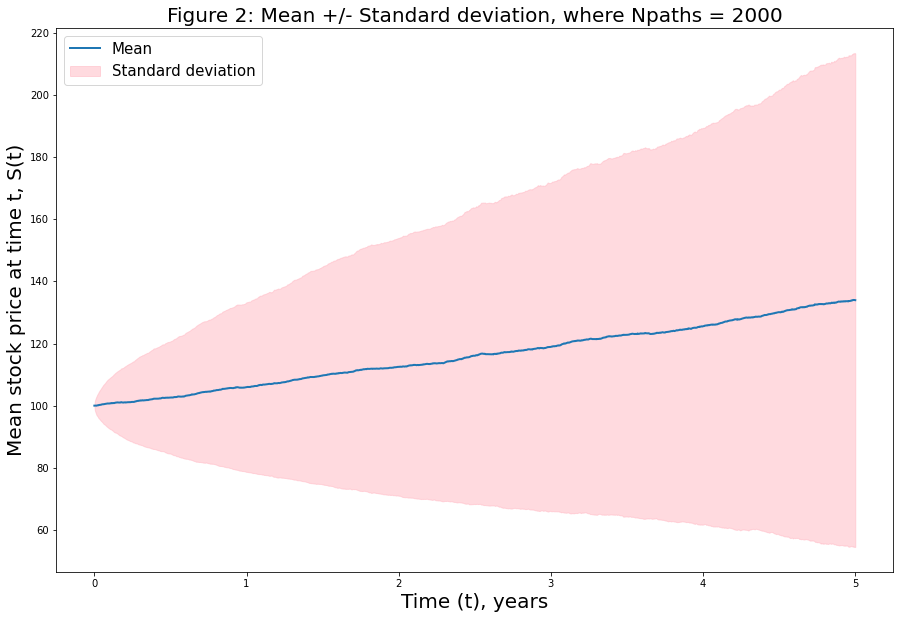

In [25]:
# Gets the time grid and solution array from the function, this time Npaths = 2000
t2, S2 = SDE_GBM(S0, tf, mu, sigma, 2000)

S2_mean = np.mean(S2,1)
S2_std = np.std(S2,1)
# Plot shaded region between X_mean - X_std and X_mean + X_std

plt.figure(figsize=(15,10))
plt.fill_between(t2, 
                 S2_mean - S2_std, 
                 S2_mean + S2_std, 
                 alpha=0.5, color="lightpink", label = "Standard deviation")

# Plot the mean itself
plt.plot(t2, S2_mean, linewidth=2, label = "Mean")

# labels, titles, making plot look pretty etc.
plt.xlabel("Time (t), years", fontsize=20)
plt.ylabel("Mean stock price at time t, S(t)", fontsize=20)
plt.title("Figure 2: Mean +/- Standard deviation, where Npaths = 2000", fontsize=20)
plt.legend(loc="upper left", fontsize = 15)
plt.show()

print()

Figure 2 compactly shows the statistical behaviours of the sample paths. One can clearly see the mean of all 2000 paths and one can see the variation between the 2000 paths (as measured by the standard deviation) as time increases so Figure 2 helps make sense of Figure 1.

Figure 2 shows that on average, out of the 2000 paths, the price of a stock increases slowly as time increases which is what is expected. A similar (but not so similar comment) can also be made about the Standard deviation.


The mean for the histogram corresponding to day 300 is 105.12441722718172
The standard deviation for the histogram corresponding to day 300 is 24.351234491154138

The mean for the histogram corresponding to day 700 is 112.00267744703017
The standard deviation for the histogram corresponding to day 700 is 40.61871574468244

The mean for the histogram corresponding to day 1825 is 134.1691170745026
The standard deviation for the histogram corresponding to day 1825 is 80.76172489557327



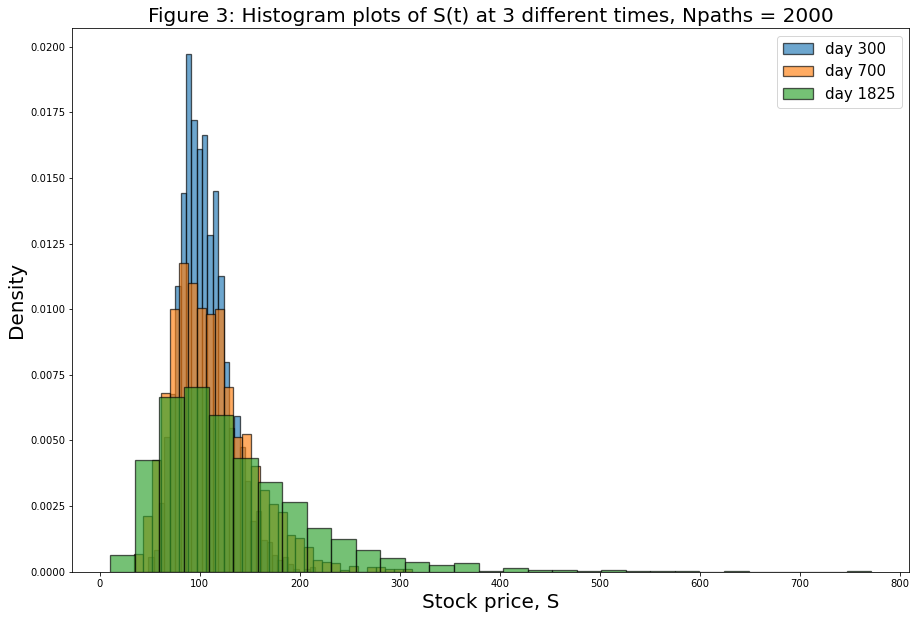

In [26]:
times = [300, 700, 365 * 5]
'''above is the list of the 3 different times (in days) which I will be using to plot
   my histograms, one of which is the final time as required'''


# labels, titles, making plots look pretty etc.
plt.figure(figsize=(15,10))
plt.xlabel("Stock price, S", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.title("Figure 3: Histogram plots of S(t) at 3 different times, Npaths = 2000", fontsize=20)

'''Below I loop through my list of times and plot each histogram at 3 different times
   using each element of the list
   as it saves me having to write very similar code 3 times, I also print the mean and standard deviation
   of each histogram using a lognormal distribution because it was indicated in one of the investopedia
   articles that Price levels are lognormally distributed but Price returns are normally distributed.'''

'''I could've also just taken the standard mean and standard deviation using np.mean and np.std and they would differ
   only slightly from when using lognorm'''

for i in range(0,len(times)):
    plt.hist(S2[times[i],:], bins=31, density=True, label = "day {}".format(times[i]), alpha = 0.65, ec = "black", lw = 1.3)
    s, loc, scale = lognorm.fit(S2[times[i],:], floc=0)
    print("The mean for the histogram corresponding to day {} is {}".format(times[i], lognorm.mean(s, loc, scale)))
    print("The standard deviation for the histogram corresponding to day {} is {}".format(times[i], lognorm.std(s, loc, scale)))
    print()

plt.legend(fontsize = 15)
plt.show()

The histograms in Figure 3 are skewed right, 
and in a skewed right distribution, the bulk of the observations are small/medium, with a few observations that are much larger than the rest

So the bulk of stock prices at the end of the 5 years are small/medium, with a few stock prices that are much larger than the rest.

Thus Figure 3 only confirms what we saw in Figure 1, that most paths perform fairly similarly but there are some that perform extremely well in comparison to the others (like the one in pink for example).

NOTE: I mention Figure 1 as we expect similar behaviour if we were to plot the paths where Npaths = 2000

#### Challenge section (worth 4 of the 12 marks)

The histograms you just plotted correspond to a known distribution. 

- Find this distribution and use SciPy or otherwise to generate and plot distributions on the histograms above.
- Discuss how the mean of the distribution depends on time and give a financial interpretation. Explain why the median of the distribution is less than the mean.

The mean for the histogram corresponding to day 300 is 105.12441722718172
The standard deviation for the histogram corresponding to day 300 is 24.351234491154138

The mean for the histogram corresponding to day 700 is 112.00267744703017
The standard deviation for the histogram corresponding to day 700 is 40.61871574468244

The mean for the histogram corresponding to day 1825 is 134.1691170745026
The standard deviation for the histogram corresponding to day 1825 is 80.76172489557327



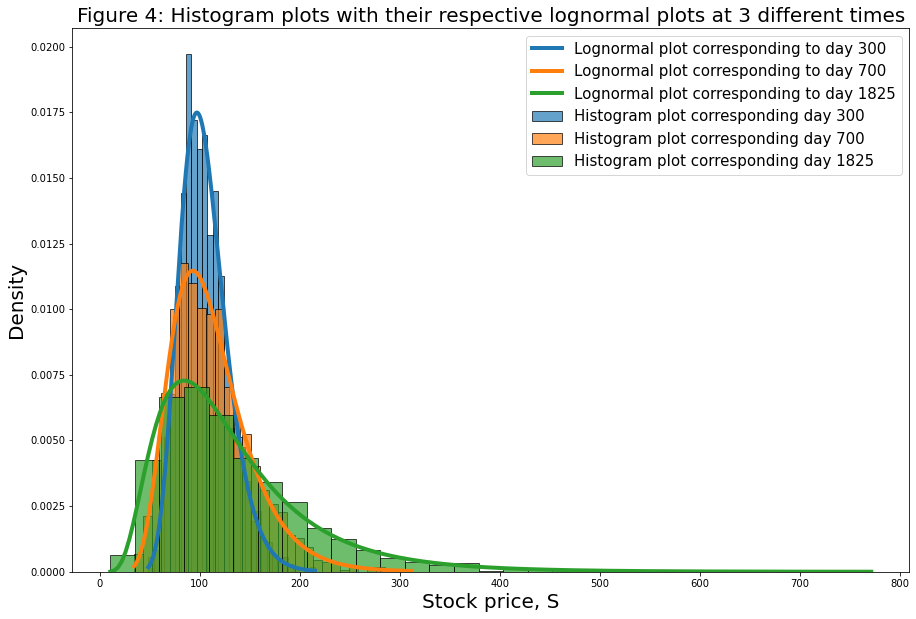

In [28]:
# a list of the colors used by default to imitate the colors used in Figure 3 as I think they look nice
#and to ensure that the color of the lognormal plot is the same of the histogram that it is being plotted on
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

#labels, titles, making the plot look pretty etc.
plt.figure(figsize=(15,10))
plt.xlabel("Stock price, S", fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.title("Figure 4: Histogram plots with their respective lognormal plots at 3 different times", fontsize=20)

'''very similar to what I did and explained in the code cell above (explanation copied below for reference)
   only this time I actually plot the lognormal distribution on each of the histograms
   as well as plot the histograms'''

'''Below I loop through my list of times and plot each histogram at 3 different times
   using each element of the list
   as it saves me having to write very similar code 3 times, I also print the mean and standard deviation
   of each histogram using a lognormal distribution because it was indicated in one of the investopedia
   articles that Price levels are lognormally distributed but Price returns are normally distributed.'''

for i in range(0,len(times)):
    plt.hist(S2[times[i],:], bins=31, density=True, label = "Histogram plot corresponding day {} ".format(times[i]), color = colors[i], alpha = 0.69 ,ec='black')
    s, loc, scale = lognorm.fit(S2[times[i],:], floc=0)
    xmin = np.amin(S2[times[i],:])
    xmax = np.amax(S2[times[i],:])
    
    x = np.linspace(xmin, xmax, 201)
    pdf = lognorm.pdf(x, s, scale=scale)
    plt.plot(x, pdf, lw = 4, label = "Lognormal plot corresponding to day {}".format(times[i]))
    
    print("The mean for the histogram corresponding to day {} is {}".format(times[i], lognorm.mean(s, loc, scale)))
    print("The standard deviation for the histogram corresponding to day {} is {}".format(times[i], lognorm.std(s, loc, scale)))
    print()

plt.legend(fontsize = 15)
plt.show()

Stock price levels are lognormally distributed, therefore the shape of the curve is assymetric.

The lognormal median is $e^{\mu}$ which is always less than the lognormal mean which is $e^{\mu+(1/2)\sigma^2}$.


So the mean is greater than the median by a factor of $e^{(1/2) \sigma^2}$. The mean being greater than the median is another sign that the lognormal distribution is assymetric more specifically it's skewed right.

Since $\sigma $ and $\mu$ both depend on time the lognormal mean must also depend on time.

And by Figure 2 as time increases the mean stock price also increases therefore a financial interpretation would be that the longer you hold a stock the more gains you are likely to make (i.e the more likely it is that the stock price will increase).

---

## Further 3 marks

A further 3 marks will be awarded for each assignment based on overall quality and clarity of the submitted notebook. 


---

## Submission

You will submit **two Jupyter notebooks**, one for each part. **These must be `.ipynb` files, not pdf files or any other file type**. 

- The last thing you should do before submitting the notebooks is to Restart Kernel and Run All Cells. You should then save the notebooks and submit the .ipynb files. **You will lose one mark if you submit notebooks that have not been run.**

- Short templates are provided to get you started.

- A good guide for what the final notebooks should be like is: if the notebook is run and all code cells are collapsed, the notebook should be readable as a **short** report, primarily consisting of 
    - A short introduction describing what problem is being solved and briefly how.
    - In the case of the Geometric Brownian Motion, specify the parameter values used. 
    - Describe each of the figures (this is very important).


- Use the weekly notebooks as a guide for Python style. Make sure your functions have comments describing what they do. One assumes the reader understands Python. Add comments to set off blocks of code or to note anything tricky. In most cases Python code explains itself.

---